# Flatmaps of final parcellation

In [3]:
import sys

import ProbabilisticParcellation.evaluate as ev
import ProbabilisticParcellation.util as ut
import ProbabilisticParcellation.export_atlas as ea
import ProbabilisticParcellation.scripts.atlas_paper.parcel_hierarchy as ph
import ProbabilisticParcellation.scripts.atlas_paper.evaluate_atlas as eva
import SUITPy as suit
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import torch as pt
import os
import nitools as nt

from pathlib import Path
import numpy as np
import Functional_Fusion.atlas_map as am
import scipy.linalg as sl
import nibabel as nb
import nitools as nt
import re

In [4]:
# Figure settings
figsize = (8, 8)
colorbar = False
bordersize = 4

background='white'
if background=='black':
    fontcolor='w'
    bordercolor='w'
    backgroundcolor='k'
elif background=='white':
    fontcolor='k'
    bordercolor='k'
    backgroundcolor='w'





# Symmetric 68 map
Asymmetric parcellation was generated by freezing the emission models of the symmetric 68 parcellation and fitting an asymmetric arrangement model

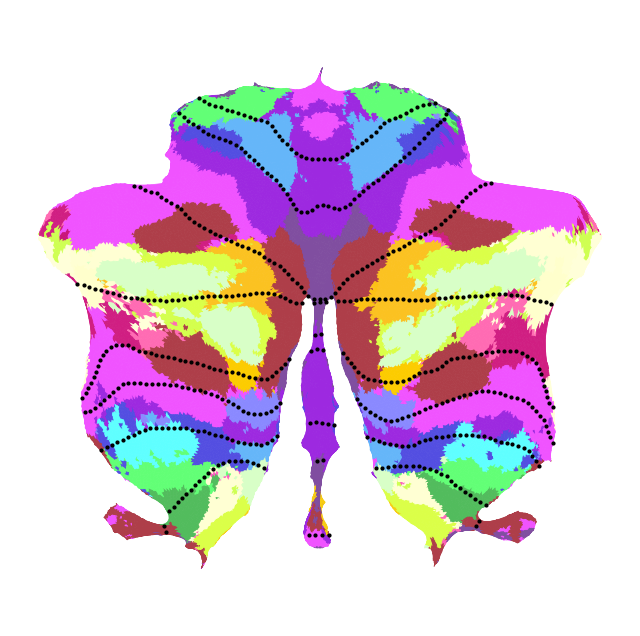

In [6]:

_, cmap, labels = nt.read_lut(ut.export_dir + 'NettekovenSym68.lut')
pseg = nb.load(ut.export_dir + 'NettekovenSym68_space-MNISymC2_probseg.nii')

plt.figure(figsize=figsize)
surf_data = suit.flatmap.vol_to_surf(pseg, stats='nanmean',
                                             space='MNISymC')
label = np.argmax(surf_data, axis=1) + 1
suit.flatmap.plot(label,
    render='matplotlib',
    cmap=cmap,
    new_figure=False,
    label_names=labels,
    overlay_type='label',
    colorbar=colorbar,
    bordersize=bordersize, bordercolor=bordercolor, backgroundcolor=backgroundcolor)
# ax.show()
plt.savefig(ut.figure_dir + f'NettekovenSym68_flatmap{backgroundcolor}.png', dpi=300,bbox_inches='tight')

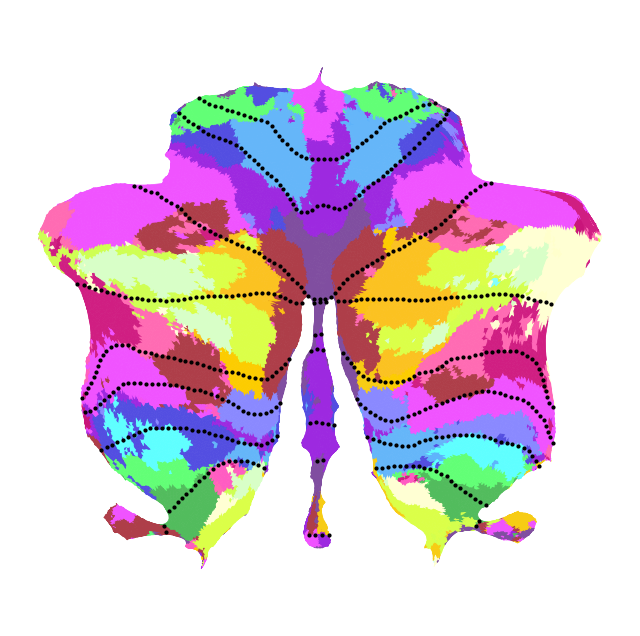

In [7]:
_, cmap, labels = nt.read_lut(ut.export_dir +
                              'NettekovenAsym68.lut')
pseg = nb.load(
    ut.export_dir + 'NettekovenAsym68_space-MNISymC2_probseg.nii')

plt.figure(figsize=figsize)
surf_data = suit.flatmap.vol_to_surf(pseg, stats='nanmean',
                                     space='MNISymC')
label = np.argmax(surf_data, axis=1) + 1
suit.flatmap.plot(label,
                  render='matplotlib',
                  cmap=cmap,
                  new_figure=False,
                  label_names=labels,
                  overlay_type='label',
                  colorbar=colorbar,
                   bordersize=bordersize, bordercolor=bordercolor, backgroundcolor=backgroundcolor)
plt.savefig(ut.figure_dir + f'NettekovenAsym68_flatmap{backgroundcolor}.png', dpi=300,bbox_inches='tight')

# Clustered parcellation (32)
At K=32, medium level, clustered using assignment

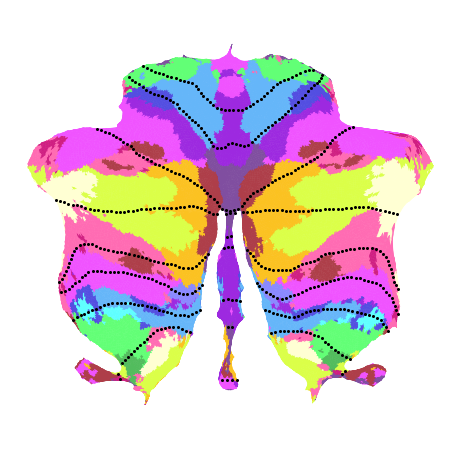

In [5]:

ut.export_dir = '/Volumes/diedrichsen_data$/data/Cerebellum/ProbabilisticParcellationModel/Atlases/'
_, cmap, labels = nt.read_lut(ut.export_dir +
                              'NettekovenSym32.lut')
pseg = nb.load(ut.export_dir + 'NettekovenSym32_space-MNISymC2_probseg.nii')

plt.figure(figsize=figsize)
surf_data = suit.flatmap.vol_to_surf(pseg, stats='nanmean',
                                             space='MNISymC')
label = np.argmax(surf_data, axis=1) + 1
suit.flatmap.plot(label,
                  render='matplotlib',
                  cmap=cmap,
                  new_figure=False,
                  label_names=labels,
                  overlay_type='label',
                  colorbar=colorbar,
                   bordersize=bordersize, bordercolor=bordercolor, backgroundcolor=backgroundcolor)
plt.savefig(ut.figure_dir + f'NettekovenSym32_flatmap{backgroundcolor}.png', dpi=300,bbox_inches='tight')

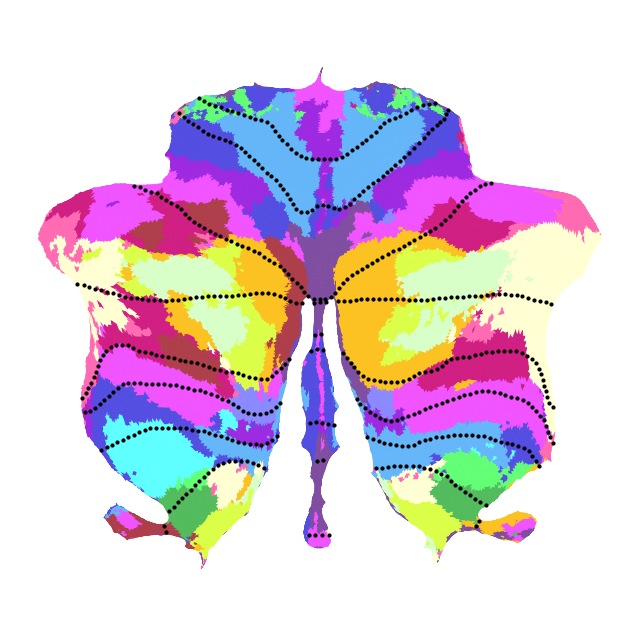

In [8]:

ut.export_dir = '/Volumes/diedrichsen_data$/data/Cerebellum/ProbabilisticParcellationModel/Atlases/'
_, cmap, labels = nt.read_lut(ut.export_dir +
                              'NettekovenAsym32.lut')
pseg = nb.load(ut.export_dir + 'NettekovenAsym32_space-MNISymC2_probseg.nii')

plt.figure(figsize=figsize)
surf_data = suit.flatmap.vol_to_surf(pseg, stats='nanmean',
                                             space='MNISymC')
label = np.argmax(surf_data, axis=1) + 1
suit.flatmap.plot(label,
                  render='matplotlib',
                  cmap=cmap,
                  new_figure=False,
                  label_names=labels,
                  overlay_type='label',
                  colorbar=colorbar,
                   bordersize=bordersize, bordercolor=bordercolor, backgroundcolor=backgroundcolor)
plt.savefig(ut.figure_dir + f'NettekovenAsym32_flatmap{backgroundcolor}.png', dpi=300,bbox_inches='tight')

## Domain Plot (Clusters)

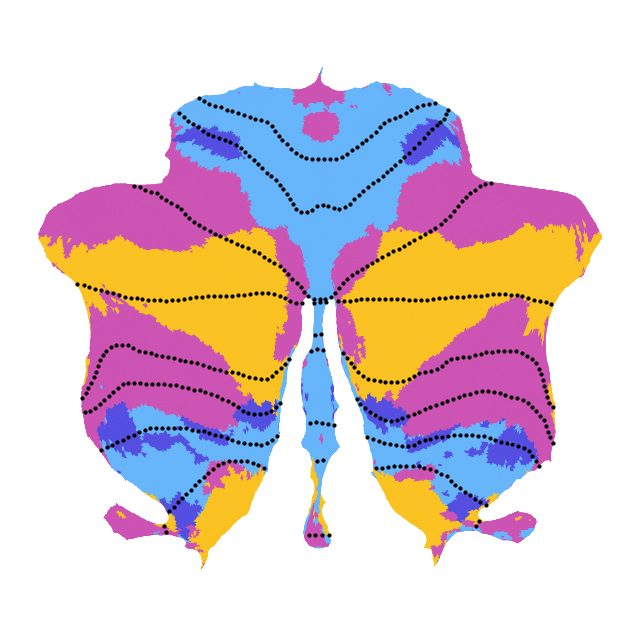

In [4]:

ut.export_dir = '/Volumes/diedrichsen_data$/data/Cerebellum/ProbabilisticParcellationModel/Atlases/'
_, cmap, labels = nt.read_lut(ut.export_dir +
                              'NettekovenSym32_domain.lut')
pseg = nb.load(ut.export_dir + 'NettekovenSym32_space-MNISymC2_probseg.nii')

plt.figure(figsize=figsize)
surf_data = suit.flatmap.vol_to_surf(pseg, stats='nanmean',
                                             space='MNISymC')
label = np.argmax(surf_data, axis=1) + 1
ax = suit.flatmap.plot(label,
    render='matplotlib',
    cmap=cmap,
    new_figure=False,
    label_names=labels,
    overlay_type='label',
    colorbar=colorbar,
     bordersize=bordersize, bordercolor=bordercolor, backgroundcolor=backgroundcolor)
# ax.show()
plt.savefig(ut.figure_dir + f'NettekovenSym32_domain_flatmap{backgroundcolor}.png', dpi=300,bbox_inches='tight')


## Highlight specific parcels / domains

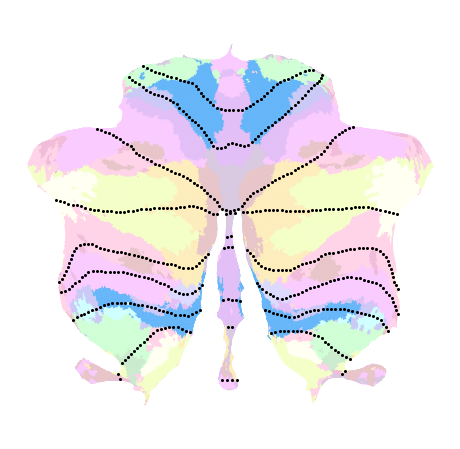

In [8]:
# Domain to highlight
highlight = 'M3'
fade = 1.0 # Fade toward white (1.0), black (0.0), or gray (0.5)
blend = 0.7 # Strength of fade

# load the colormap and labels
_, cmap, labels = nt.read_lut(ut.export_dir +
                              'NettekovenSym32.lut')
hl_indx=[l.startswith(highlight) for l in labels]
cmap[np.logical_not(hl_indx),:]=cmap[np.logical_not(hl_indx),:] * (1-blend) + fade * (blend)

pseg = nb.load(ut.export_dir + 'NettekovenSym32_space-MNISymC2_probseg.nii')

plt.figure(figsize=figsize)
surf_data = suit.flatmap.vol_to_surf(pseg, stats='nanmean',
                                             space='MNISymC')
label = np.argmax(surf_data, axis=1) + 1
suit.flatmap.plot(label,
                  render='matplotlib',
                  cmap=cmap,
                  new_figure=False,
                  label_names=labels,
                  overlay_type='label',
                  colorbar=colorbar,
                   bordersize=bordersize, bordercolor=bordercolor, backgroundcolor=backgroundcolor)
plt.savefig(ut.figure_dir + f'NettekovenSym32_flatmap{backgroundcolor}_{highlight}.png', dpi=300,bbox_inches='tight')